# Task 1

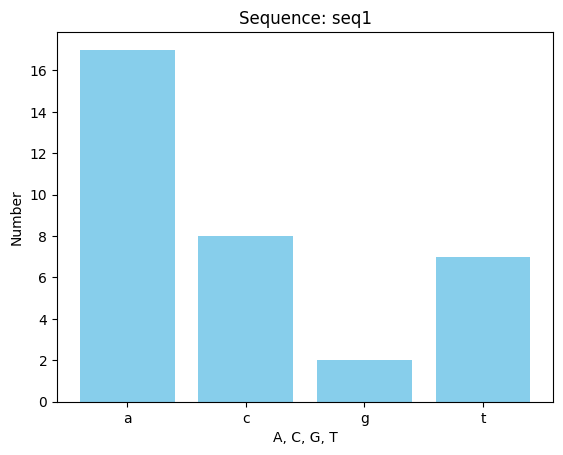

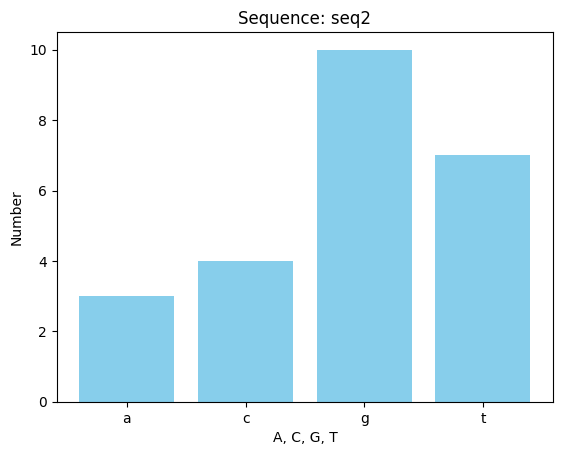

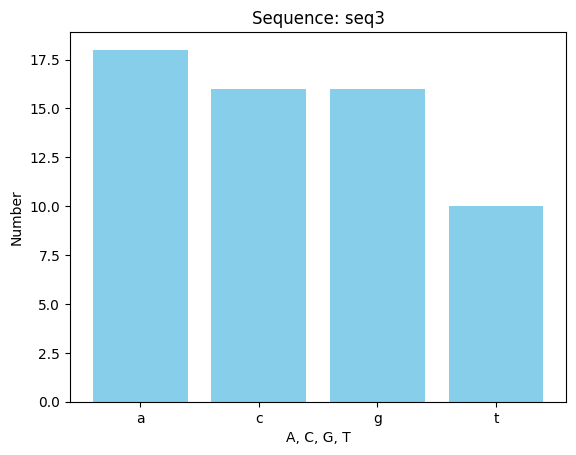

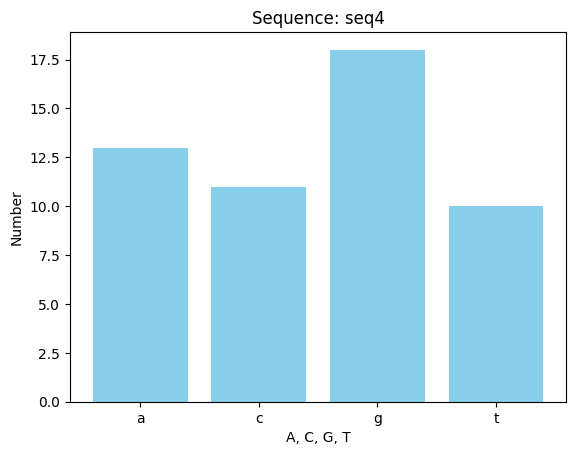

In [1]:
import matplotlib.pyplot as plt  # Used to create the bar chart

def plot_dna_counts(seq_id, dna_data):
    """
    Takes a sequence ID and a dictionary of DNA counts (A, C, G, T),
    then creates a bar chart visualizing their frequencies.
    """

    plt.bar(dna_data.keys(), dna_data.values(), color='skyblue')
    # Initially I forgot to call the method with (), which caused an error.
    # Inspiration for this fix and the bar plot came from: https://www.datacamp.com/tutorial/python-bar-plot

    plt.xlabel('A, C, G, T')
    plt.ylabel('Number')
    plt.title(f'Sequence: {seq_id}')
    plt.show()  # Displays the chart

# Initialize DNA count dictionary and sequence ID variable
with open("dna_raw.txt", "r") as f_read:
    dna_data = {'a': 0, 'c': 0, 'g': 0, 't': 0}
    seq_id = None

# Process the file line by line
with open("dna_raw.txt", "r") as f_read:
    for line in f_read:
        line = line.strip().lower()  # Removes whitespace and converts to lowercase

        if line.startswith('>'):  # Indicates a new sequence
            if seq_id is not None:  # Conditional check to plot the previous sequence
                plot_dna_counts(seq_id, dna_data)

            seq_id = line[1:].strip()  # Removes '>' and saves sequence ID
            dna_data = {'a': 0, 'c': 0, 'g': 0, 't': 0}  # Resets counts for the new sequence
        else:
            for dna in line:
                if dna in dna_data:
                    dna_data[dna] += 1  # Increases count for each base

# Plot the last sequence after finishing the loop
if seq_id is not None:
    plot_dna_counts(seq_id, dna_data)

# Task 2 - part 1

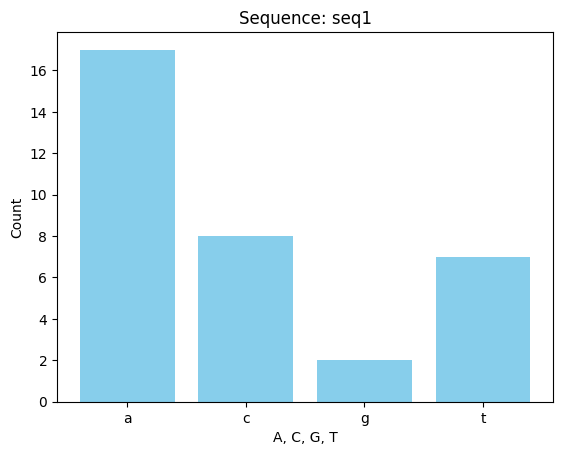

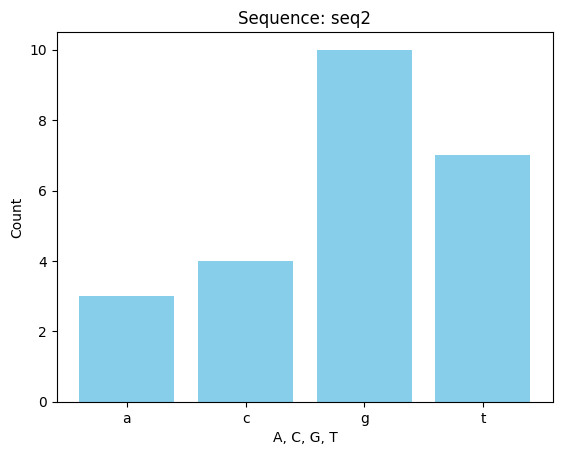

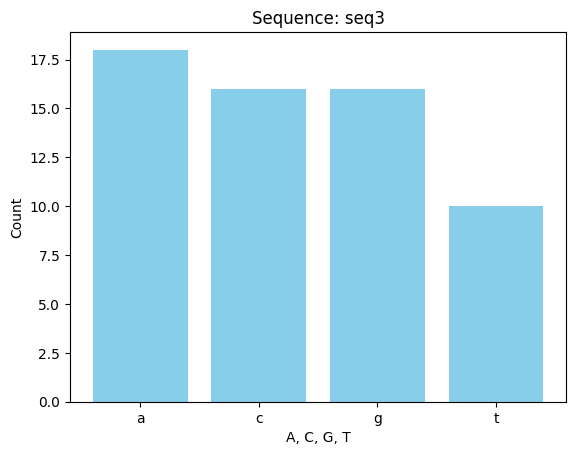

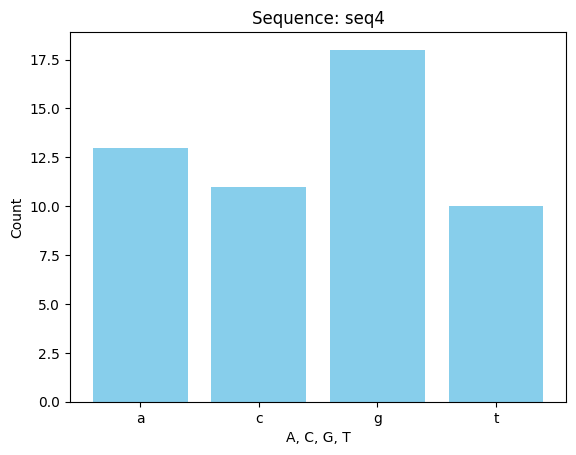

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib to create bar charts

# Function to plot DNA base counts for a sequence
def plot_dna_counts(seq_id, dna_data):
  
    # Create the bar chart (x-axis = DNA bases, y-axis = counts)
    plt.bar(dna_data.keys(), dna_data.values(), color='skyblue')

    # Add labels and title for clarity
    plt.xlabel('A, C, G, T')        # Label for x-axis
    plt.ylabel('Count')             # Label for y-axis
    plt.title(f'Sequence: {seq_id}') # Title with the sequence name

    # Display the chart
    plt.show()


# Function to read and analyze a DNA file
def raw_dna_file(filename):

    # Open the file (automatically closes after reading)
    with open(filename, "r") as f_read:
        dna_data = {'a': 0, 'c': 0, 'g': 0, 't': 0}  # Initialize counts
        seq_id = None  # Stores the current sequence ID

        # Read the file line by line
        for line in f_read:
            line = line.strip().lower()  # Remove whitespace and lowercase

            if not line:
                continue  # Skip empty lines

            # Check if the line is a sequence header
            if line.startswith('>'):
                # Plot the previous sequence before starting a new one
                if seq_id is not None:
                    plot_dna_counts(seq_id, dna_data)

                # Get the new sequence ID
                seq_id = line[1:].strip()

                # Reset counts for the new sequence
                dna_data = {'a': 0, 'c': 0, 'g': 0, 't': 0}
            else:
                # Count DNA bases in the current line
                for dna in line:
                    if dna in dna_data:
                        dna_data[dna] += 1

        # After reading the file, plot the last sequence
        if seq_id is not None:
            plot_dna_counts(seq_id, dna_data)


# Test the function on a simple DNA file
raw_dna_file("dna_raw.txt")


# Task 2 - part 2

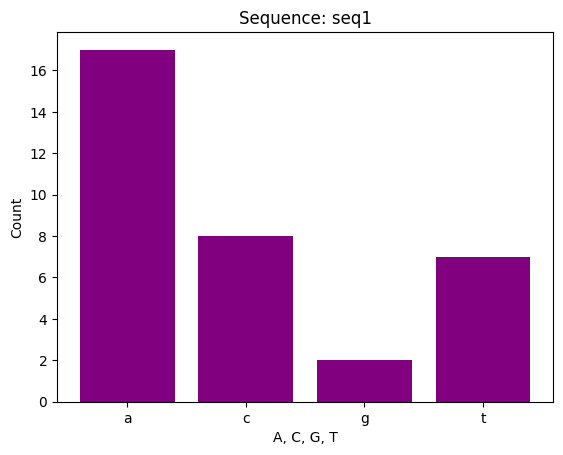

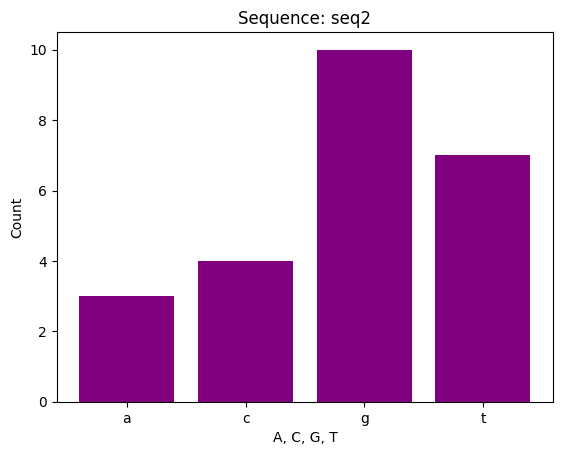

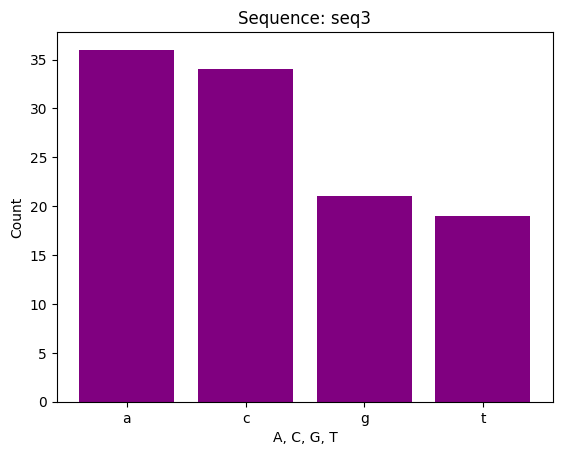

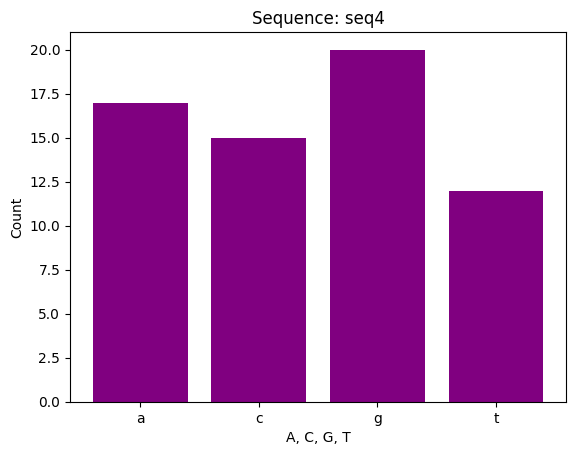

In [6]:
# Task 2 - Part 2:
# This version can handle more complex DNA files.
# Each DNA sequence in dna_raw_complicated.txt can have multiple lines.
# The program reads all lines until it finds a new sequence that starts with '>'

import matplotlib.pyplot as plt  # Import matplotlib to create bar charts

# Function to plot the counts of DNA bases for a sequence
def plot_dna_counts(seq_id, dna_data):

    # Create the bar chart (x-axis = DNA bases, y-axis = counts)
    plt.bar(dna_data.keys(), dna_data.values(), color='purple')

    # Add labels and title to make the chart easier to read
    plt.xlabel('A, C, G, T')        # Label for x-axis
    plt.ylabel('Count')             # Label for y-axis
    plt.title(f'Sequence: {seq_id}') # Title showing the sequence name

    # Display the chart
    plt.show()


# Function to read and analyze a DNA file with multiple sequences
def complex_dna_file(filename):
  
    # Open the file using 'with' to ensure it closes automatically
    with open(filename, "r") as f_read:
        # Initialize base counts
        dna_data = {'a': 0, 'c': 0, 'g': 0, 't': 0}
        seq_id = None  # Stores the seq ID

        # Read the file line by line
        for line in f_read:
            line = line.strip().lower()  # Remove whitespace and convert to lowercase

            if not line:
                continue  # Skip empty lines

            # If the line starts with '>', a new sequence begins
            if line.startswith('>'):
                # If there was a previous sequence, plot it first
                if seq_id is not None:
                    plot_dna_counts(seq_id, dna_data)

                # Get the new sequence ID, meaning everything after '>'
                seq_id = line[1:].strip()

                # Reset counts for the new sequence
                dna_data = {'a': 0, 'c': 0, 'g': 0, 't': 0}
            else:
                # Count DNA bases in the current line
                for dna in line:
                    if dna in dna_data:  # Only count valid DNA letters
                        dna_data[dna] += 1

        # After reading the file, plot the last sequence
        if seq_id is not None:
            plot_dna_counts(seq_id, dna_data)


# Test the function on the file "dna_raw_complicated.txt"
# It counts the bases and creates bar charts for each sequence
complex_dna_file("dna_raw_complicated.txt")

In [ ]:
""" Reflection:
# I spent several hours reviewing YouTube videos, lecture material, and class notes to build this.
# I also used an LLM (AI assistant) to fact-check and clean up the code somewhat since it had
# lots of unnessecary code.
# For example, my first version opened the file multiple times unnecessarily.
# I got completely stuck trying to figure out how to get it to read multiple lines instead of line-by-line
# so I got information from here: https://www.geeksforgeeks.org/python/python-continue-statement/ and
# https://www.askpython.com/python/examples/read-multiple-lines-python """